In [1]:
from urllib2 import Request, urlopen
from urlparse import urlparse, urlunparse
import requests, requests_cache
import pandas as pd
import json
from wordcloud import WordCloud
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from bs4 import BeautifulSoup
import re
from os import listdir
from os import chdir
from os.path import isfile, join
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import string
from textblob import TextBlob

In [35]:
import numpy as np

In [37]:
ind = np.arange(3)

In [3]:
chdir('../sta141bfinal/all/')

In [4]:
def read_text(filename):
    """
    This function reads a txt file with filtered or unfiltered list of titles
    Input: A txt file
    Output: Filtered list of titles
    """
    
    title_names = []
    text_file = open(filename,"r")

    for line in text_file:
        line = line.strip()
        title_names.append(line)

    return title_names

In [5]:
huff = read_text("huffpost.txt")
abc = read_text("abc.txt")
economist = read_text("economist.txt")
fox = read_text("fox.txt")
npr = read_text("npr.txt")
nytimes = read_text("nytimes.txt")
washington = read_text("washington.txt")
wsj = read_text("wsj.txt")
breitbart = read_text("breitbart.txt")

In [7]:
def noun_polarity(total_list):

    noun_phrases = []
    for title in total_list:
        blob = TextBlob(title)
        noun_phrases.extend(blob.noun_phrases)
    
    noun_polarity = []
    for noun in noun_phrases:
        blob = TextBlob(noun)
        noun_polarity.append(blob.sentiment.polarity)
    
    return noun_polarity


In [8]:
huff_noun_pol = noun_polarity(huff)

In [9]:
abc_noun_pol = noun_polarity(abc)

In [10]:
economist_noun_pol = noun_polarity(economist)

In [11]:
fox_noun_pol = noun_polarity(fox)

In [12]:
npr_noun_pol = noun_polarity(npr)

In [13]:
nytimes_noun_pol = noun_polarity(nytimes)

In [14]:
washington_noun_pol = noun_polarity(washington)

In [15]:
wsj_noun_pol = noun_polarity(wsj)

In [16]:
breitbart_noun_pol = noun_polarity(breitbart)

In [17]:
def polarity_levels(total_pol, name, typenews):
    pos_pol = [i for i in total_pol if i > 0]
    pos_pol = str(len(pos_pol))
    neu_pol = [i for i in total_pol if i == 0]
    neu_pol = str(len(neu_pol))
    neg_pol = [i for i in total_pol if i < 0]
    neg_pol = str(len(neg_pol))
    all_pol = [name, neg_pol, pos_pol, typenews]
    
    return all_pol

In [18]:
hp = polarity_levels(huff_noun_pol, "Huffington Post", "Liberal")

In [19]:
ab = polarity_levels(abc_noun_pol, "ABC News", "Liberal")

In [20]:
ec = polarity_levels(economist_noun_pol, "Economist", "Other")
fo = polarity_levels(fox_noun_pol, "Fox", "Conservative")
np = polarity_levels(npr_noun_pol, "NPR", "Other")
ny = polarity_levels(nytimes_noun_pol, "NYTimes", "Liberal")
wa = polarity_levels(washington_noun_pol, "Washington Post", "Liberal")
ws = polarity_levels(wsj_noun_pol, "WSJ", "Other")
br = polarity_levels(breitbart_noun_pol, "Breitbart", "Conservative")

In [22]:
df = pd.DataFrame([hp, ab, ec, fo, np, ny, wa, ws, br])

In [23]:
df_conservative = df[df[3] == "Conservative"]
df_conservative

,0,1,2,3
3,Fox,23,28,Conservative
8,Breitbart,4,11,Conservative


In [24]:
df_other = df[df[3] == "Other"]
df_other

,0,1,2,3
2,Economist,1,3,Other
4,NPR,47,61,Other
7,WSJ,9,11,Other


In [25]:
df_liberal = df[df[3] == "Liberal"]
df_liberal

,0,1,2,3
0,Huffington Post,31,29,Liberal
1,ABC News,10,9,Liberal
5,NYTimes,7,11,Liberal
6,Washington Post,11,21,Liberal


In [26]:
lib1 = str(sum(df_liberal[1].astype(int)))
con1 = str(sum(df_conservative[1].astype(int)))
oth1 = str(sum(df_other[1].astype(int)))

In [27]:
lib2 = str(sum(df_liberal[2].astype(int)))
con2 = str(sum(df_conservative[2].astype(int)))
oth2 = str(sum(df_other[2].astype(int)))
total_other = [oth1, oth2]
total_con = [con1, con2]
total_lib = [lib1, lib2]

In [80]:
sid = SentimentIntensityAnalyzer()
pos = []
neg = []
neu = []
for sentence in breitbart:
    ss = sid.polarity_scores(sentence)
    pos.append(ss['pos'])
    neg.append(ss['neg'])
    neu.append(ss['neu'])

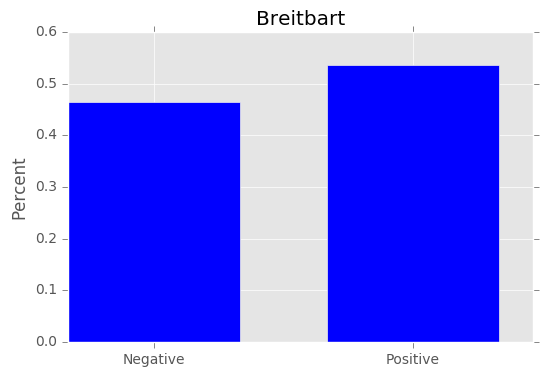

In [84]:
positive = sum([x for x in pos])
negative = sum([x for x in neg])
bars = [negative/(positive + negative), positive/(positive + negative)]
N = len(bars)
x = range(N)
width = 1/1.5
ind = np.arange(N)  # the x locations for the groups
fig, ax = plt.subplots()
this = ax.bar(x, bars, width, color="blue")
ax.set_ylabel('Percent')
ax.set_title('Breitbart')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(( 'Negative', 'Positive'))
plt.show()

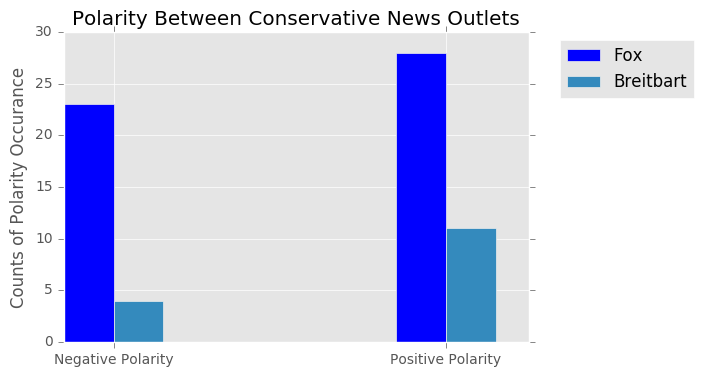

In [75]:
ind = np.arange(2)
width = 0.15
fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, df_conservative.iloc[0, 1:3].values, width, color='b')

rects2 = ax.bar(ind+width, df_conservative.iloc[1, 1:3].values, width)

ax.set_ylabel('Counts of Polarity Occurance')
ax.set_xticks(ind+width)
ax.set_title("Polarity Between Conservative News Outlets")
ax.set_xticklabels( ('Negative Polarity', 'Positive Polarity') )
ax.legend( (rects1[0], rects2[0]), ('Fox', 'Breitbart'), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

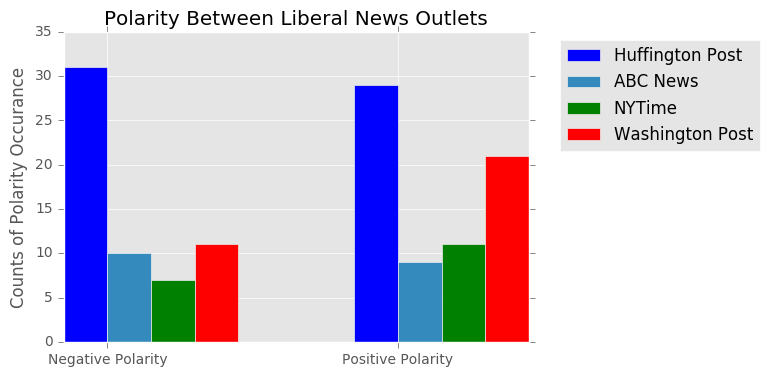

In [76]:
ind = np.arange(2)
width = 0.15
fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, df_liberal.iloc[0, 1:3].values, width, color='b')

rects2 = ax.bar(ind+width, df_liberal.iloc[1, 1:3].values, width)
rects3 = ax.bar(ind+width+width, df_liberal.iloc[2, 1:3].values, width, color = 'g')
rects4 = ax.bar(ind+width+width+width, df_liberal.iloc[3, 1:3].values, width, color = 'r')

ax.set_ylabel('Counts of Polarity Occurance')
ax.set_xticks(ind+width)
ax.set_title("Polarity Between Liberal News Outlets")
ax.set_xticklabels( ('Negative Polarity',  'Positive Polarity') )
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Huffington Post', 'ABC News', 'NYTime', 'Washington Post'), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

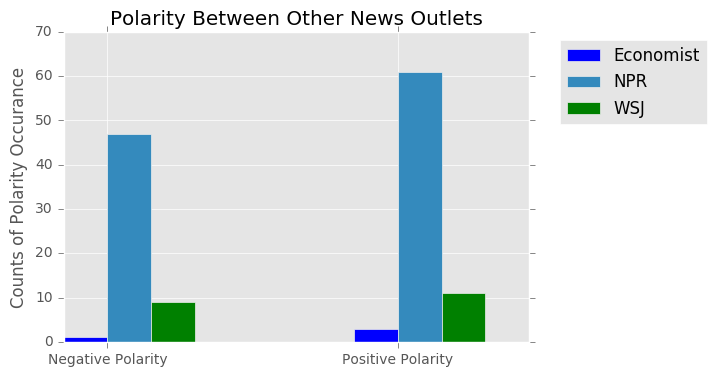

In [77]:
#ind = np.arange(3)
width = 0.15
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, df_other.iloc[0, 1:3].values, width, color='b')

rects2 = ax.bar(ind+width, df_other.iloc[1, 1:3].values, width)
rects3 = ax.bar(ind+width+width, df_other.iloc[2, 1:3].values, width, color = 'g')


ax.set_ylabel('Counts of Polarity Occurance')
ax.set_xticks(ind+width)
ax.set_title("Polarity Between Other News Outlets")
ax.set_xticklabels( ('Negative Polarity', 'Positive Polarity') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Economist', 'NPR', 'WSJ'), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

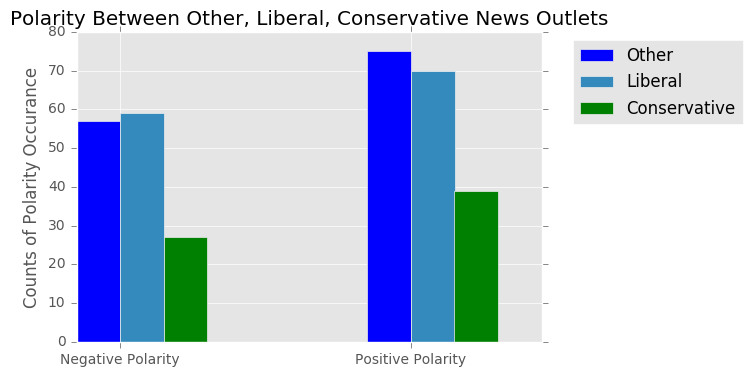

In [78]:
#ind = np.arange(2)
width = 0.15
fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, total_other, width, color='b')

rects2 = ax.bar(ind+width, total_lib, width)
rects3 = ax.bar(ind+width+width, total_con, width, color = 'g')


ax.set_ylabel('Counts of Polarity Occurance')
ax.set_xticks(ind+width)
ax.set_title("Polarity Between Other, Liberal, Conservative News Outlets")
ax.set_xticklabels( ('Negative Polarity', 'Positive Polarity') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Other', 'Liberal', 'Conservative'), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()